In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [12]:
insurance_data=pd.read_csv("C:/Users/hriti/Downloads/insurance.csv")


### Display Top 7 Rows of The Dataset

In [13]:
insurance_data.head(7)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960


### 2. Check Last 7 Rows of The Dataset

In [14]:
insurance_data.tail(7)

,age,sex,bmi,children,smoker,region,charges
1331,23,female,33.40,0,no,southwest,10795.93733
1332,52,female,44.70,3,no,southwest,11411.68500
1333,50,male,30.97,3,no,northwest,10600.54830
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500
1337,61,female,29.07,0,yes,northwest,29141.36030


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [15]:
insurance_data.shape

(1338, 7)

In [16]:
print("Number of rows",insurance_data.shape[0])
print("Number of columns",insurance_data.shape[1])

Number of rows 1338
Number of columns 7


### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [17]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 5.Check Null Values In The Dataset

In [18]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 6. Get Overall Statistics About The Dataset

In [19]:
insurance_data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### 7. Covert Columns From String ['sex' ,'smoker','region' ] To Numerical Values 

In [20]:
insurance_data['sex'].unique()
insurance_data['sex']=insurance_data['sex'].map({'female':0,'male':1})
insurance_data['smoker']=insurance_data['smoker'].map({'yes':1,'no':0})
insurance_data['region']=insurance_data['region'].map({'southwest':1,'southeast':2,
                   'northwest':3,'northeast':4})

In [21]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


### 8. Store Feature Matrix In X and Response(Target) In Vector y

In [22]:
X = insurance_data.drop(['charges'],axis=1)
y = insurance_data['charges']

### 9. Train/Test split
##### 1. Split data into two part : a training set and a testing set
##### 2. Train the model(s) on training set
##### 3. Test the Model(s) on Testing set

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### 10. Import the models

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### 11. Model Training

In [25]:
Lr = LinearRegression()
Lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
Rfr = RandomForestRegressor()
Rfr.fit(X_train,y_train)
Gr = GradientBoostingRegressor()
Gr.fit(X_train,y_train)

GradientBoostingRegressor()

### 12. Prediction on Test Data

In [26]:
y_pred1 = Lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = Rfr.predict(X_test)
y_pred4 = Gr.predict(X_test)

df = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'svm':y_pred2,'Rfr':y_pred3,'Gr':y_pred4})

In [27]:
df

,Actual,Lr,svm,Rfr,Gr
764,9095.06825,8924.407244,9548.261584,10638.895442,11001.128629
887,5272.17580,7116.295018,9492.515425,5002.667273,5840.174656
890,29330.98315,36909.013521,9648.758701,28520.465308,28001.980112
1293,9301.89355,9507.874691,9555.044136,9585.569026,9745.291602
259,33750.29180,27013.350008,9420.421978,34876.721729,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47322.882774,45431.423211
575,12222.89830,11814.555568,9625.431547,12223.746800,12465.025294
535,6067.12675,7638.107736,9504.168517,6515.637513,6974.336525
543,63770.42801,40959.081722,9605.004594,46686.446159,47862.047791


### 13. Compare Performance Visually 

In [28]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


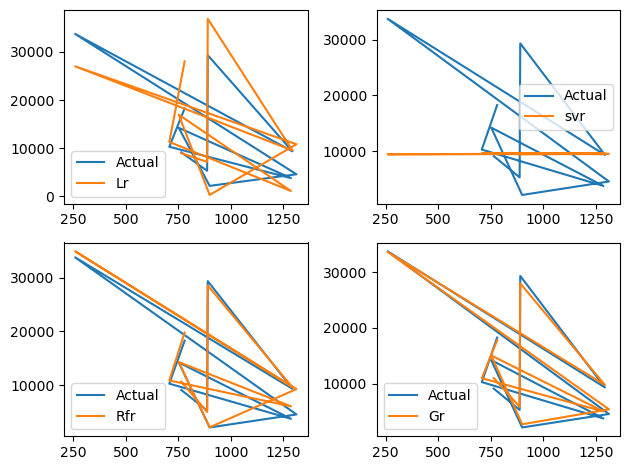

In [29]:
plt.subplot(221)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['Rfr'].iloc[0:11],label="Rfr")
plt.legend()

plt.subplot(224)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['Gr'].iloc[0:11],label="Gr")

plt.tight_layout()

plt.legend()

### 14. Evaluating the Algorithm

In [30]:
from sklearn import metrics

In [31]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [32]:
print(score1,score2,score3,score4)

0.7833463107364539 -0.07229762787861826 0.8636173310525146 0.8779936181637191


In [33]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [34]:
print(s1,s2,s3,s4)

4186.508898366433 8592.428727899724 2502.5611302919474 2447.167158715136


### 15. Predict Charges For New Customer

In [35]:
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

In [36]:
df1 = pd.DataFrame(data,index=[0])
df1

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [37]:
new_pred = Gr.predict(df1)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  43839.34586293143


### From above we found that gredianBoostingRegressor is the best model for this dataset. Before production, it is good practice to train our model on the entire dataset.

In [38]:
Gr = GradientBoostingRegressor()
Gr.fit(X,y)

GradientBoostingRegressor()

### Predict Charges For New Customer

In [39]:
new_pred = Gr.predict(df1)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  42148.36188800322


# Deployment

In [40]:
import joblib

In [41]:
joblib.dump(Gr,'model_joblib_Gr')

['model_joblib_Gr']

In [42]:
model=joblib.load('model_joblib_Gr')

In [43]:
model.predict(df1)

array([42148.361888])

# GUI

In [44]:
import matplotlib
matplotlib.use('Agg')

In [45]:
import tkinter
import sys
import os

In [46]:
from tkinter import*

In [47]:
import joblib

In [50]:
import tkinter as tk

def data_entry():
    el1=float(en1.get())
    el2=float(en2.get())
    el3=float(en3.get())
    el4=float(en4.get())
    el5=float(en5.get())
    el6=float(en6.get())
    
    model=joblib.load('model_joblib_Gr')
    result=model.predict([[e1,e2,e3,e4,e5,e6]])
    Label(master,text="Health Insurance cost").grid(row=7)
    Label(master,text=result).grid(row=8)

master=tk.Tk()
master.title("Health Insurance cost Pridiction")
label=Label(master,text="Health Insurance cost",bg="black",fg="white",).grid(row=0,columnspan=2)
Label(master,text="Enter your Age").grid(row=1)
Label(master,text="Enter 0 for female and 1 for male").grid(row=2)
Label(master,text="Enter BMI Value").grid(row=3)
Label(master,text="Enter your Number of Children").grid(row=4)
Label(master,text="Enter 0 for not smoker and 1 for  smoker").grid(row=5)
Label(master,text="Enter region[1-4]").grid(row=6)

en1=Entry(master)
en2=Entry(master)
en3=Entry(master)
en4=Entry(master)
en5=Entry(master)
en6=Entry(master)

en1.grid(row=1,column=1)
en2.grid(row=2,column=1)
en3.grid(row=3,column=1)
en4.grid(row=4,column=1)
en5.grid(row=5,column=1)
en6.grid(row=6,column=1)

Button(master,text="Predict",command= data_entry).grid()

mainloop()